<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/collab_practice_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.collab import *

In [34]:
from google.colab import files
files.upload()

{}

In [35]:
!pwd

/content


In [36]:
path = Path('/content')
path.ls()

[PosixPath('/content/.config'),
 PosixPath('/content/u.item'),
 PosixPath('/content/u.data'),
 PosixPath('/content/sample_data')]

In [0]:
user, item, title = 'userId', 'movieId', 'title'

In [38]:
pd.read_csv(path/'u.data').head()

,196\t242\t3\t881250949
0,186\t302\t3\t891717742
1,22\t377\t1\t878887116
2,244\t51\t2\t880606923
3,166\t346\t1\t886397596
4,298\t474\t4\t884182806


In [0]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header = None, names = [user, item, 'rating', 'timestamp'])

In [40]:
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [41]:
!cat u.item

1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0
2|GoldenEye (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?GoldenEye%20(1995)|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
3|Four Rooms (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
4|Get Shorty (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)|0|1|0|0|0|1|0|0|1|0|0|0|0|0|0|0|0|0|0
5|Copycat (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Copycat%20(1995)|0|0|0|0|0|0|1|0|1|0|0|0|0|0|0|0|1|0|0
6|Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)|01-Jan-1995||http://us.imdb.com/Title?Yao+a+yao+yao+dao+waipo+qiao+(1995)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|0|0|0|0
7|Twelve Monkeys (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Twelve%20Monkeys%20(1995)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|1|0|0|0
8|Babe (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Babe%20(1995)|0|0|0|0|1

UnicodeDecodeError: ignored

In [42]:
[*[f'g{i}' for i in range(19)]]

['g0',
 'g1',
 'g2',
 'g3',
 'g4',
 'g5',
 'g6',
 'g7',
 'g8',
 'g9',
 'g10',
 'g11',
 'g12',
 'g13',
 'g14',
 'g15',
 'g16',
 'g17',
 'g18']

In [0]:
movies = pd.read_csv(path/'u.item', delimiter = '|', header = None, encoding = 'latin-1', names = [item, title, 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])

In [44]:
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [45]:
len(ratings)

100000

In [0]:
rating_movie = ratings.merge(movies[[item, title]])

In [47]:
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [0]:
y_range = [0, 5.5]

In [0]:
data = CollabDataBunch.from_df(rating_movie, seed = 42, valid_pct=0.1, item_name=title)

In [49]:
data.show_batch()

userId,title,target
255,"Believers, The (1987)",2.0
761,In Love and War (1996),2.0
618,Mystery Science Theater 3000: The Movie (1996),2.0
314,Mr. Holland's Opus (1995),5.0
303,Friday (1995),4.0


In [0]:
y_range = [0, 5.5]
def get_learner(n_factors):
  learn = collab_learner(data, n_factors=n_factors, y_range=y_range, wd=1e-01)
  print(learn.lr_find())
  print(learn.recorder.plot(skip_end =15))
  learn.save(f'stage_{n_factors}')
  return learn

In [0]:
def train_learner(learn, lr, n_factors = 0):
  if n_factors > 0:
    learn.load(f'stage_{n_factors}')
  print(learn.fit_one_cycle(3, lr))
  # return learn
  #learn.recorder.plot_losses()
  #learn.recorder.plot_lr()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
None
None


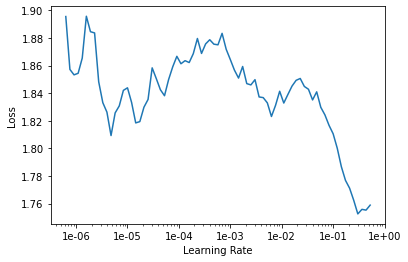

In [77]:
learn = get_learner(10)

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
None
None


epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
None
None


epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
None
None


epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
None
None


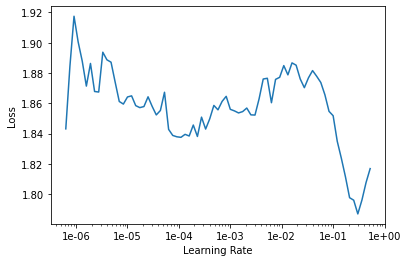

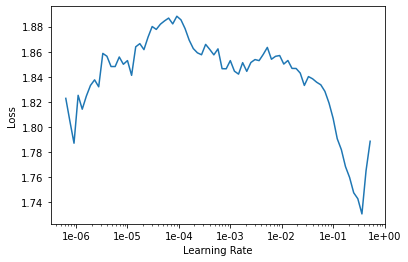

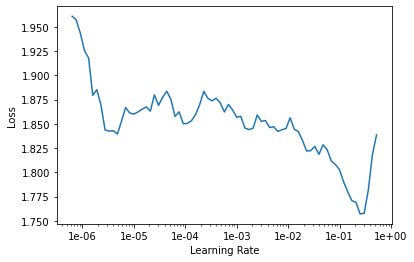

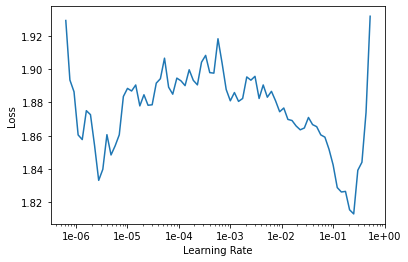

In [79]:
for i in [10, 20, 40, 80]:
  learn = get_learner(i)

In [0]:
train_learner(learn, 2e-02, 10)

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
None
None


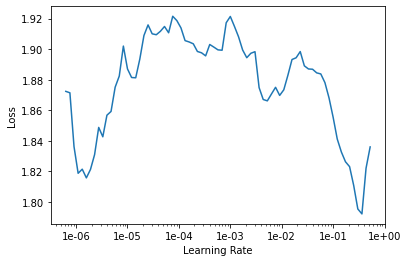

In [81]:
learn = get_learner(20)

In [82]:
train_learner(learn, 2e-02, 20)

epoch,train_loss,valid_loss,time
0,0.984595,1.007668,00:13
1,0.901196,0.904841,00:13
2,0.744364,0.846694,00:13


None


CollabLearner(data=TabularDataBunch;

Train: LabelList (90000 items)
x: CollabList
userId 196; title Kolya (1996); ,userId 63; title Kolya (1996); ,userId 226; title Kolya (1996); ,userId 154; title Kolya (1996); ,userId 306; title Kolya (1996); 
y: FloatList
3.0,3.0,5.0,3.0,5.0
Path: .;

Valid: LabelList (10000 items)
x: CollabList
userId 498; title Casino (1995); ,userId 642; title Pocahontas (1995); ,userId 58; title 2001: A Space Odyssey (1968); ,userId 495; title Cat People (1982); ,userId 618; title Philadelphia (1993); 
y: FloatList
3.0,5.0,4.0,3.0,3.0
Path: .;

Test: None, model=EmbeddingDotBias(
  (u_weight): Embedding(944, 20)
  (i_weight): Embedding(1654, 20)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=FlattenedLoss of MSELoss(), metrics=[], true_wd=True, bn_wd=True, wd=0.1, train_bn=True, path=PosixPath('.'), model_dir='models', callback_fns=[functools.partial(<clas

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
None
None


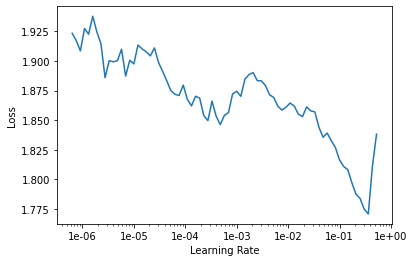

In [89]:
learn = get_learner(40)

In [91]:
train_learner(learn, 5e-03, 40)

epoch,train_loss,valid_loss,time
0,0.925580,0.930691,00:13
1,0.806529,0.851070,00:13
2,0.697962,0.831383,00:13


None


epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
None
None


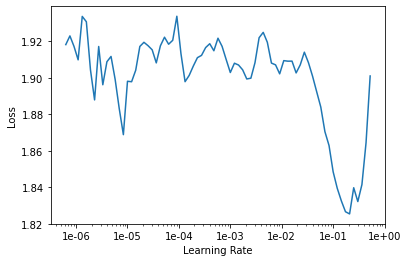

In [87]:
learn = get_learner(80)

In [88]:
train_learner(learn, 1e-02)

epoch,train_loss,valid_loss,time
0,1.001016,0.994911,00:13
1,0.845153,0.882302,00:13
2,0.551561,0.846095,00:13


None


In [0]:
learn.save('dot_prod')

In [93]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

In [0]:
g = rating_movie.groupby(title)['rating'].count()

In [101]:
g.head()

title
'Til There Was You (1997)      9
1-900 (1994)                   5
101 Dalmatians (1996)        109
12 Angry Men (1957)          125
187 (1997)                    41
Name: rating, dtype: int64

In [0]:
top_movies = g.sort_values(ascending=False).index.values[:1000]

In [103]:
top_movies

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', ...,
       'In the Bleak Midwinter (1995)', 'Party Girl (1995)', 'Highlander III: The Sorcerer (1994)',
       'Bastard Out of Carolina (1996)'], dtype=object)

In [0]:
movie_bias=learn.bias(top_movies, is_item = True)

In [106]:
len(movie_bias)

1000

In [0]:
mean_rating = rating_movie.groupby(title)['rating'].mean()

In [109]:
mean_rating.head()

title
'Til There Was You (1997)    2.333333
1-900 (1994)                 2.600000
101 Dalmatians (1996)        2.908257
12 Angry Men (1957)          4.344000
187 (1997)                   3.024390
Name: rating, dtype: float64

In [112]:
c = 0
for i in zip(top_movies, movie_bias):
  print(i)
  c += 1
  if c > 10:
    break

('Star Wars (1977)', tensor(0.5026))
('Contact (1997)', tensor(0.4133))
('Fargo (1996)', tensor(0.3848))
('Return of the Jedi (1983)', tensor(0.4033))
('Liar Liar (1997)', tensor(0.1017))
('English Patient, The (1996)', tensor(0.1546))
('Scream (1996)', tensor(0.2423))
('Toy Story (1995)', tensor(0.3111))
('Air Force One (1997)', tensor(0.3003))
('Independence Day (ID4) (1996)', tensor(0.1810))
('Raiders of the Lost Ark (1981)', tensor(0.3769))


In [0]:
movie_ratings = [(b, i, mean_rating.loc[i]) for i, b in zip(top_movies, movie_bias)]

In [115]:
movie_ratings[:10]

[(tensor(0.5026), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.4133), 'Contact (1997)', 3.8035363457760316),
 (tensor(0.3848), 'Fargo (1996)', 4.155511811023622),
 (tensor(0.4033), 'Return of the Jedi (1983)', 4.007889546351085),
 (tensor(0.1017), 'Liar Liar (1997)', 3.156701030927835),
 (tensor(0.1546), 'English Patient, The (1996)', 3.656964656964657),
 (tensor(0.2423), 'Scream (1996)', 3.4414225941422596),
 (tensor(0.3111), 'Toy Story (1995)', 3.8783185840707963),
 (tensor(0.3003), 'Air Force One (1997)', 3.6310904872389793),
 (tensor(0.1810), 'Independence Day (ID4) (1996)', 3.438228438228438)]

In [0]:
item_0 = lambda x: x[0]

In [117]:
sorted(movie_ratings, key = item_0)[:15]

[(tensor(-0.3072),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.2695),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2652), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.2550), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2459), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2428), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2374), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2368), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2359), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2343), 'Beautician and the Beast, The (1997)', 2.313953488372093),
 (tensor(-0.2281), 'Beverly Hills Ninja (1997)', 2.3125),
 (tensor(-0.2216), "McHale's Navy (1997)", 2.1884057971014492),
 (tensor(-0.2161), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.2085), 'Leave It to Beaver (1997)', 1.8409090909090908),
 (t

In [118]:
sorted(movie_ratings, key = item_0, reverse=True)[:15]

[(tensor(0.6010), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5814), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5361), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.5334), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5299), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5164), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5026), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.4961), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.4494), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.4482), 'Close Shave, A (1995)', 4.491071428571429),
 (tensor(0.4471), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.4432), 'Usual Suspects, The (1995)', 4.385767790262173),
 (tensor(0.4376), 'Vertigo (1958)', 4.251396648044692),
 (tensor(0.4350), 'Princess Bride, The (1987)', 4.172839506172839),
 (tensor(0.4265), 'Apt Pupil (1998)', 4.1)]

In [0]:
movie_w = learn.weight(top_movies, is_item= True)

In [121]:
movie_w.shape

torch.Size([1000, 40])

In [124]:
len(movie_w[0])

40

In [0]:
movie_pca = movie_w.pca(3)

In [126]:
movie_pca

tensor([[-0.8049,  0.7032, -0.3162],
        [-0.0327,  0.2721, -0.2380],
        [-0.8320, -0.2885, -0.2638],
        ...,
        [ 0.2671, -0.2880,  0.0314],
        [ 0.8846, -0.1018,  0.1269],
        [ 0.5455,  0.1634, -0.0827]])

In [0]:
fac_0, fac_1, fac_2 = movie_pca.t()

In [132]:
fac_0.shape

torch.Size([1000])

In [0]:
movie_comp = [(f, i) for f, i in zip(fac_2, top_movies)]

In [147]:
sorted(movie_comp, key = itemgetter(0), reverse = True)[:15]

[(tensor(0.5995), 'E.T. the Extra-Terrestrial (1982)'),
 (tensor(0.5538), 'Gone with the Wind (1939)'),
 (tensor(0.5494), 'Wizard of Oz, The (1939)'),
 (tensor(0.5364), 'Miracle on 34th Street (1994)'),
 (tensor(0.5257), 'Old Yeller (1957)'),
 (tensor(0.5144), 'Dirty Dancing (1987)'),
 (tensor(0.5116), 'Sound of Music, The (1965)'),
 (tensor(0.5090), 'Dumbo (1941)'),
 (tensor(0.4759), 'Ghost (1990)'),
 (tensor(0.4622), 'Cinema Paradiso (1988)'),
 (tensor(0.4601), "It's a Wonderful Life (1946)"),
 (tensor(0.4561), 'My Fair Lady (1964)'),
 (tensor(0.4181), 'Mr. Smith Goes to Washington (1939)'),
 (tensor(0.4091), 'All About Eve (1950)'),
 (tensor(0.3967), 'Mary Poppins (1964)')]

In [148]:
sorted(movie_comp, key = itemgetter(0))[:15]

[(tensor(-0.6903), 'Chasing Amy (1997)'),
 (tensor(-0.6692), 'Game, The (1997)'),
 (tensor(-0.6211), 'Rock, The (1996)'),
 (tensor(-0.5433), 'Pulp Fiction (1994)'),
 (tensor(-0.5119), "Devil's Advocate, The (1997)"),
 (tensor(-0.5083), 'Reservoir Dogs (1992)'),
 (tensor(-0.4934), 'Alien: Resurrection (1997)'),
 (tensor(-0.4885), 'Clerks (1994)'),
 (tensor(-0.4850), 'Terminator, The (1984)'),
 (tensor(-0.4600), 'Heat (1995)'),
 (tensor(-0.4535), 'People vs. Larry Flynt, The (1996)'),
 (tensor(-0.4522), 'Fifth Element, The (1997)'),
 (tensor(-0.4475), 'Empire Strikes Back, The (1980)'),
 (tensor(-0.4457), 'Die Hard (1988)'),
 (tensor(-0.4355), 'Blues Brothers, The (1980)')]

In [0]:
idxs = np.random.choice(len(top_movies), 50, replace = False)

In [156]:
idxs

array([755, 320, 399, 795, 554, 197, 277, 292, 553, 902, 788, 686, 473,  67, 651, 721, 820, 720, 212, 253, 679, 345,
       319, 156, 371,  45, 418, 752, 546,  93, 170, 422, 322, 173, 261, 603, 317, 447,  13, 116, 879, 344, 263, 534,
       968, 962, 593, 837,  34, 476])

In [0]:
idxs = list(range(50))

In [166]:
X = fac_0[idxs]
Y = fac_2[idxs]
X

tensor([-0.8049, -0.0327, -0.8320, -0.1872,  0.6720, -0.4056,  0.3249, -0.2206,
         0.3793,  0.4318, -0.6106, -0.9205, -0.7626, -0.2470, -0.7322, -0.0041,
        -0.5571,  0.1808, -0.7421,  0.0186, -0.2235, -0.0692,  0.3966, -0.2397,
        -0.1377, -0.3839, -0.6193, -0.2829, -0.7763,  0.5433, -0.3525,  0.0248,
        -0.3234, -0.3390, -0.6871, -0.8176, -0.4619, -0.4493, -0.4514, -0.1903,
         0.4244, -0.0225, -0.0656,  0.6581, -0.5373, -0.3870, -0.4238, -0.7845,
        -0.2673, -0.4438])

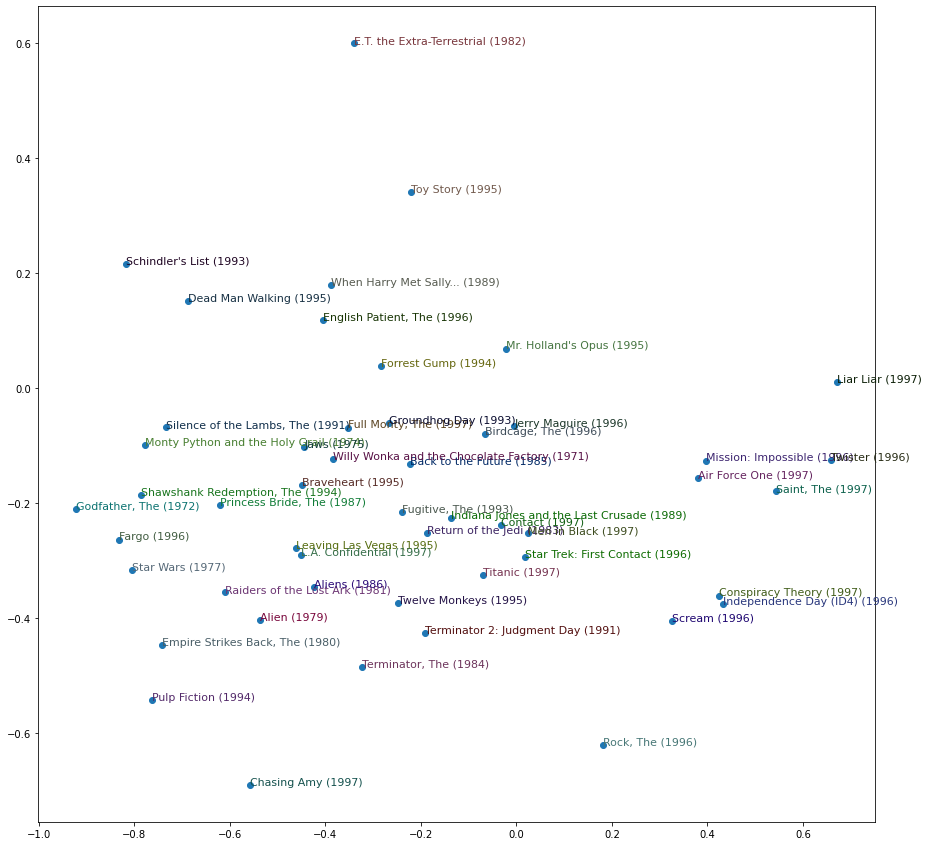

In [168]:
plt.figure(figsize = (15, 15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
  plt.text(x, y, i, color = np.random.rand(3)*0.5, fontsize = 11)
plt.show()